In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import layer
import missingno as msno
import seaborn as sns
import warnings
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import log_loss
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.pipeline import Pipeline

In [135]:
warnings.filterwarnings('ignore')

In [136]:
def load_data(input):
    df = pd.read_csv(input)
    return df

In [137]:
df_train = load_data('data/train.csv')

In [138]:
df_train.head()

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,ID_JBYXJEUZ8X,2020-03-18,ANQ16PZJ,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,ID_PEJJNLBUPR,2019-10-13,AB6051M4,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,ID_21L8UZQO1T,2019-12-21,A0WN66FH,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,ID_GNW2G8J4T8,2020-02-20,aq_41,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,ID_4XOX2V6SK0,2019-04-17,aq_41,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229


In [139]:
df_train = df_train.drop(['ID', 'date', 'device'], axis=1)

In [140]:
df_train.head()

,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
0,0.353465,32.560322,0.846844,22.038542,-0.000138,1.042629,-0.000143,0.291358,76.594910,10.253360,...,4181.792969,69589.453125,3181.793457,7.799846,0.278111,76.618553,9.970293,-93.110069,19.214193,63.853333
1,0.390741,32.582257,0.874493,21.545833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.507083
2,0.285751,32.578325,0.729340,23.568655,NaN,NaN,NaN,NaN,NaN,NaN,...,4440.391113,67341.109375,3440.390869,62.496590,0.416631,-97.300758,63.690605,-127.856804,40.857922,80.290833
3,-1.244985,29.989236,0.919271,16.338542,-0.000111,0.750228,-0.000083,0.000000,75.789885,20.794859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.601687
4,-1.244985,29.989236,0.858365,16.602083,-0.000127,0.792634,-0.000101,0.087338,74.787279,32.568622,...,4842.057488,64347.788635,3842.057585,4.971117,0.277157,74.786025,32.583070,-57.273638,21.864529,89.642229


In [141]:
df_train.shape

(9923, 68)

In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9923 entries, 0 to 9922
Data columns (total 68 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   site_latitude                                             9923 non-null   float64
 1   site_longitude                                            9923 non-null   float64
 2   humidity                                                  9923 non-null   float64
 3   temp_mean                                                 9903 non-null   float64
 4   SulphurDioxide_SO2_column_number_density                  4291 non-null   float64
 5   SulphurDioxide_SO2_column_number_density_amf              4291 non-null   float64
 6   SulphurDioxide_SO2_slant_column_number_density            4291 non-null   float64
 7   SulphurDioxide_cloud_fraction                             4291 non-null   float64
 8   SulphurDioxide_sen

In [143]:
df_train.dtypes

site_latitude                               float64
site_longitude                              float64
humidity                                    float64
temp_mean                                   float64
SulphurDioxide_SO2_column_number_density    float64
                                             ...   
Cloud_sensor_azimuth_angle                  float64
Cloud_sensor_zenith_angle                   float64
Cloud_solar_azimuth_angle                   float64
Cloud_solar_zenith_angle                    float64
pm2_5                                       float64
Length: 68, dtype: object

In [144]:
df_train.isnull().sum()

site_latitude                                  0
site_longitude                                 0
humidity                                       0
temp_mean                                     20
SulphurDioxide_SO2_column_number_density    5632
                                            ... 
Cloud_sensor_azimuth_angle                  1509
Cloud_sensor_zenith_angle                   1509
Cloud_solar_azimuth_angle                   1509
Cloud_solar_zenith_angle                    1509
pm2_5                                          0
Length: 68, dtype: int64

In [145]:
# checking for missing values in the data
df_train.isnull().sum().sort_values(ascending=False)

NitrogenDioxide_solar_zenith_angle                 6918
NitrogenDioxide_sensor_altitude                    6918
NitrogenDioxide_absorbing_aerosol_index            6918
NitrogenDioxide_tropopause_pressure                6918
NitrogenDioxide_NO2_slant_column_number_density    6918
                                                   ... 
temp_mean                                            20
site_latitude                                         0
site_longitude                                        0
humidity                                              0
pm2_5                                                 0
Length: 68, dtype: int64

<AxesSubplot:>

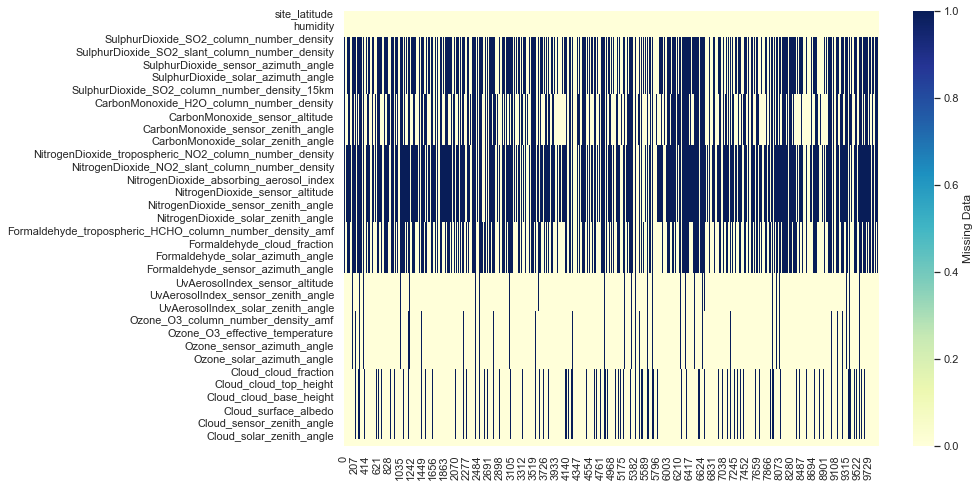

In [146]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
#plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<AxesSubplot:>

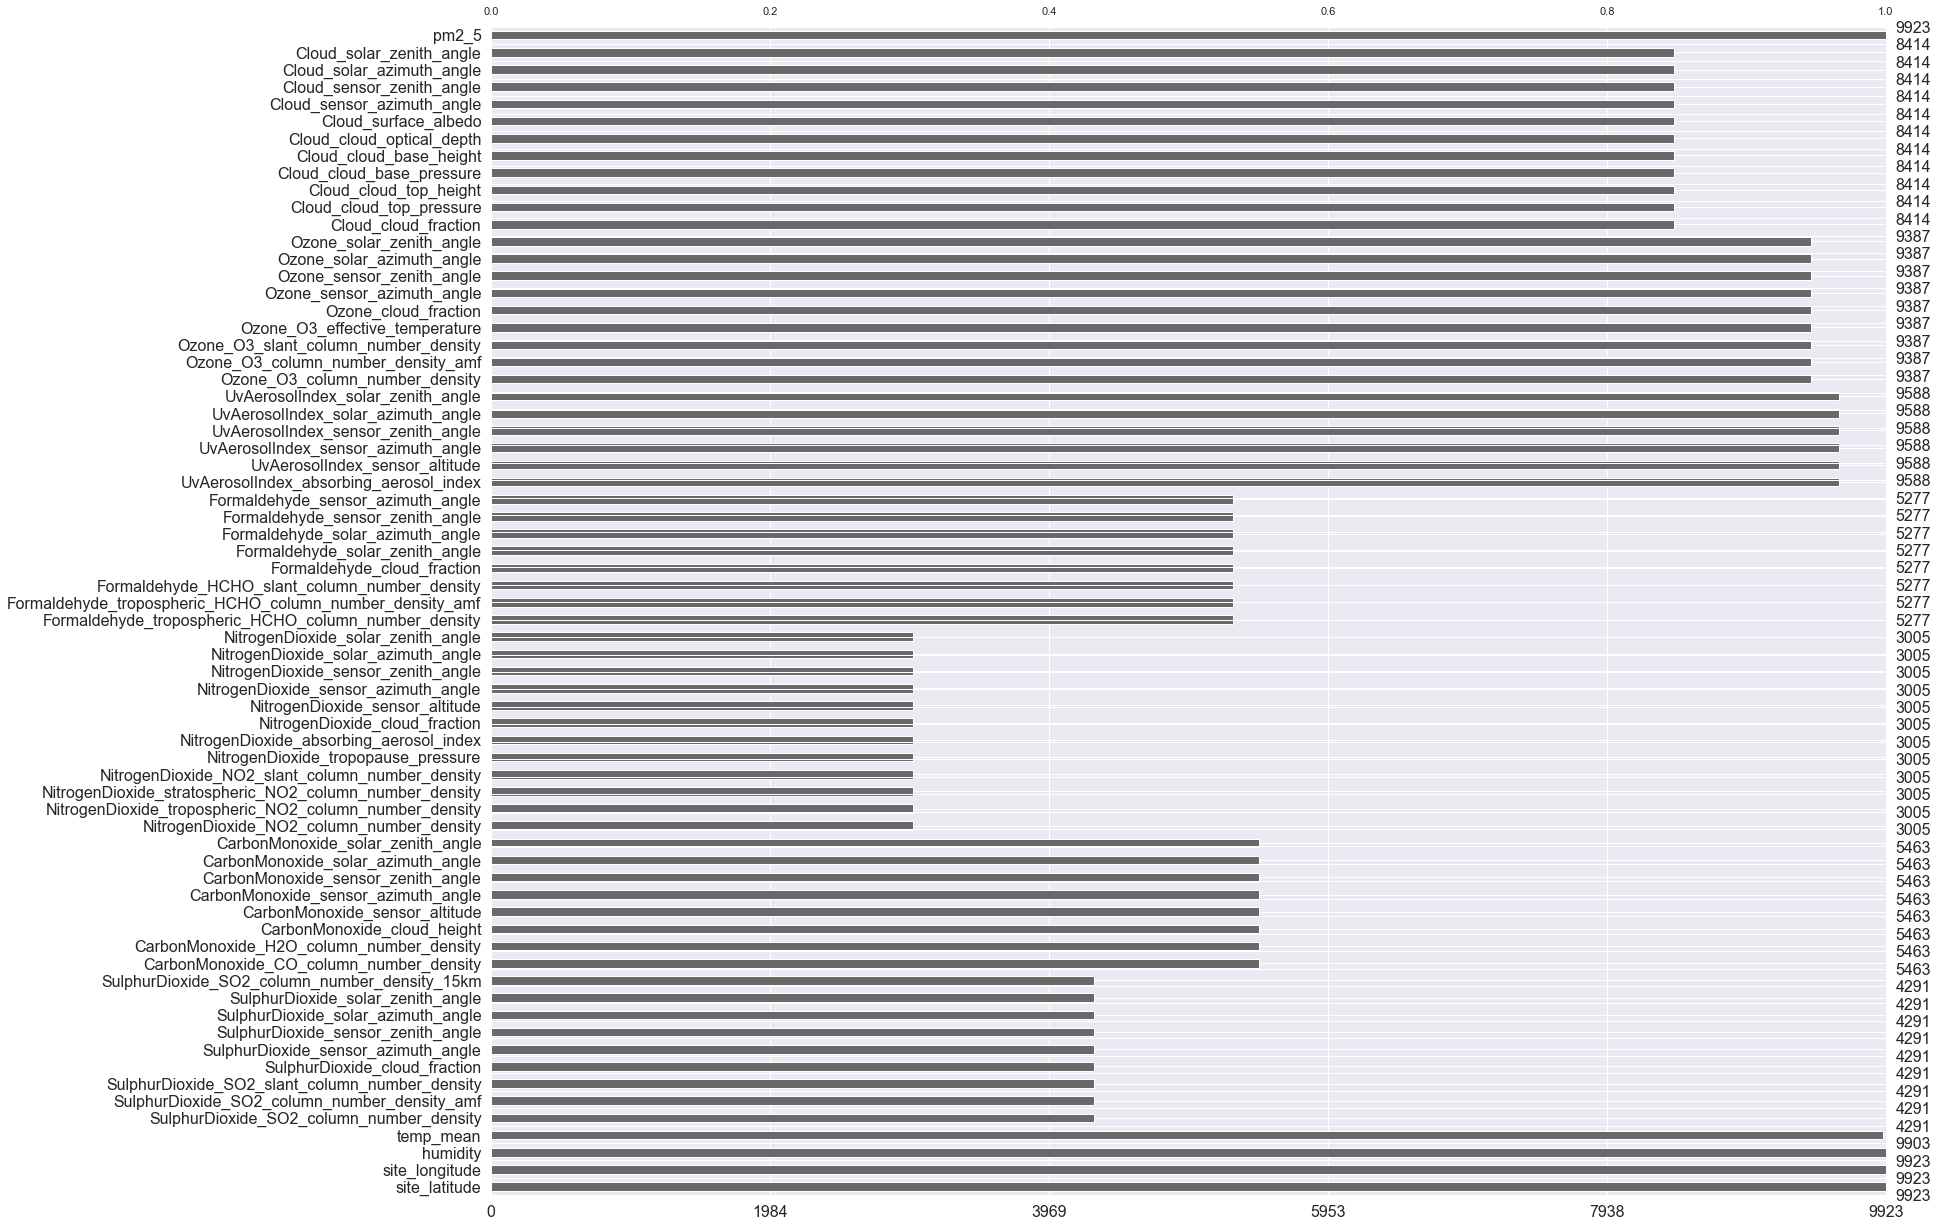

In [147]:
msno.bar(df_train)

In [148]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
percent_missing

site_latitude                                0.000000
site_longitude                               0.000000
humidity                                     0.000000
temp_mean                                    0.201552
SulphurDioxide_SO2_column_number_density    56.757029
                                              ...    
Cloud_sensor_azimuth_angle                  15.207095
Cloud_sensor_zenith_angle                   15.207095
Cloud_solar_azimuth_angle                   15.207095
Cloud_solar_zenith_angle                    15.207095
pm2_5                                        0.000000
Length: 68, dtype: float64

In [149]:
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    return l


rmissingvaluecol(df_train, 60)

# Columns having more than 60 percent missing values:  12
Columns:
 ['NitrogenDioxide_absorbing_aerosol_index', 'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_zenith_angle', 'NitrogenDioxide_solar_zenith_angle', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_solar_azimuth_angle', 'NitrogenDioxide_sensor_altitude', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_sensor_azimuth_angle', 'NitrogenDioxide_stratospheric_NO2_column_number_density']


['site_latitude',
 'site_longitude',
 'humidity',
 'temp_mean',
 'SulphurDioxide_SO2_column_number_density',
 'SulphurDioxide_SO2_column_number_density_amf',
 'SulphurDioxide_SO2_slant_column_number_density',
 'SulphurDioxide_cloud_fraction',
 'SulphurDioxide_sensor_azimuth_angle',
 'SulphurDioxide_sensor_zenith_angle',
 'SulphurDioxide_solar_azimuth_angle',
 'SulphurDioxide_solar_zenith_angle',
 'SulphurDioxide_SO2_column_number_density_15km',
 'CarbonMonoxide_CO_column_number_density',
 'CarbonMonoxide_H2O_column_number_density',
 'CarbonMonoxide_cloud_height',
 'CarbonMonoxide_sensor_altitude',
 'CarbonMonoxide_sensor_azimuth_angle',
 'CarbonMonoxide_sensor_zenith_angle',
 'CarbonMonoxide_solar_azimuth_angle',
 'CarbonMonoxide_solar_zenith_angle',
 'Formaldehyde_tropospheric_HCHO_column_number_density',
 'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
 'Formaldehyde_HCHO_slant_column_number_density',
 'Formaldehyde_cloud_fraction',
 'Formaldehyde_solar_zenith_angle',
 'F

In [150]:
# Now we are creating a new dataframe excluding these columns
#l = rmissingvaluecol(df_train, 60)
#df1 = df_train[l]

In [151]:
#df1

In [152]:
# function to impute missing values
def missing_val_imputer(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)  

In [153]:
X = df_train.drop(['pm2_5'], axis = 1)
y = df_train['pm2_5']
print(X.shape)
print(y.shape)

(9923, 67)
(9923,)


# EDA

In [154]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,SulphurDioxide_solar_azimuth_angle,SulphurDioxide_solar_zenith_angle,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,CarbonMonoxide_H2O_column_number_density,CarbonMonoxide_cloud_height,CarbonMonoxide_sensor_altitude,CarbonMonoxide_sensor_azimuth_angle,CarbonMonoxide_sensor_zenith_angle,CarbonMonoxide_solar_azimuth_angle,CarbonMonoxide_solar_zenith_angle,NitrogenDioxide_NO2_column_number_density,NitrogenDioxide_tropospheric_NO2_column_number_density,NitrogenDioxide_stratospheric_NO2_column_number_density,NitrogenDioxide_NO2_slant_column_number_density,NitrogenDioxide_tropopause_pressure,NitrogenDioxide_absorbing_aerosol_index,NitrogenDioxide_cloud_fraction,NitrogenDioxide_sensor_altitude,NitrogenDioxide_sensor_azimuth_angle,NitrogenDioxide_sensor_zenith_angle,NitrogenDioxide_solar_azimuth_angle,NitrogenDioxide_solar_zenith_angle,Formaldehyde_tropospheric_HCHO_column_number_density,Formaldehyde_tropospheric_HCHO_column_number_density_amf,Formaldehyde_HCHO_slant_column_number_density,Formaldehyde_cloud_fraction,Formaldehyde_solar_zenith_angle,Formaldehyde_solar_azimuth_angle,Formaldehyde_sensor_zenith_angle,Formaldehyde_sensor_azimuth_angle,UvAerosolIndex_absorbing_aerosol_index,UvAerosolIndex_sensor_altitude,UvAerosolIndex_sensor_azimuth_angle,UvAerosolIndex_sensor_zenith_angle,UvAerosolIndex_solar_azimuth_angle,UvAerosolIndex_solar_zenith_angle,Ozone_O3_column_number_density,Ozone_O3_column_number_density_amf,Ozone_O3_slant_column_number_density,Ozone_O3_effective_temperature,Ozone_cloud_fraction,Ozone_sensor_azimuth_angle,Ozone_sensor_zenith_angle,Ozone_solar_azimuth_angle,Ozone_solar_zenith_angle,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
site_latitude,1.00,0.98,-0.06,0.21,0.01,-0.13,0.01,0.00,-0.01,-0.01,-0.06,0.01,0.00,0.15,0.16,-0.03,-0.22,-0.01,0.00,-0.06,-0.01,0.22,0.21,0.03,0.21,-0.01,0.13,0.02,-0.17,-0.02,0.01,-0.05,0.04,0.05,-0.19,0.03,0.01,0.00,-0.07,-0.01,-0.01,-0.00,-0.22,-0.01,0.00,-0.05,-0.01,-0.07,-0.01,-0.03,0.01,-0.04,-0.01,-0.00,-0.06,-0.01,-0.04,-0.02,0.03,-0.02,0.03,-0.01,-0.04,-0.00,0.00,-0.06,-0.01,0.01
site_longitude,0.98,1.00,-0.04,0.25,0.01,-0.15,0.01,-0.03,-0.02,-0.01,-0.06,0.00,0.00,0.13,0.17,-0.03,-0.21,-0.01,-0.00,-0.06,-0.01,0.16,0.16,0.03,0.15,-0.01,0.11,-0.03,-0.16,-0.02,0.01,-0.05,0.04,0.05,-0.21,0.02,-0.02,-0.00,-0.07,-0.02,-0.01,-0.02,-0.21,-0.01,0.00,-0.05,-0.02,-0.06,-0.01,-0.03,-0.00,-0.06,-0.01,-0.00,-0.06,-0.02,-0.06,-0.05,0.06,-0.05,0.06,-0.01,-0.09,-0.01,0.00,-0.06,-0.02,-0.04
humidity,-0.06,-0.04,1.00,0.64,-0.05,0.17,-0.04,0.12,-0.02,-0.01,-0.01,-0.05,-0.04,-0.23,0.17,0.15,0.09,-0.03,0.00,-0.13,-0.05,-0.28,-0.25,-0.11,-0.26,-0.03,-0.16,0.02,0.15,-0.08,-0.03,0.01,-0.01,-0.03,0.10,-0.01,0.11,-0.05,-0.03,-0.01,-0.02,-0.00,0.06,-0.01,0.01,-0.13,-0.05,-0.05,0.01,0.00,-0.11,0.21,-0.00,0.02,-0.12,-0.06,0.22,-0.12,0.12,-0.13,0.12,0.17,0.16,0.01,0.02,-0.15,-0.06,-0.27
temp_mean,0.21,0.25,0.64,1.00,0.02,-0.13,0.02,-0.02,0.02,0.01,-0.21,-0.15,0.01,0.04,0.09,-0.05,-0.02,-0.01,-0.00,-0.20,-0.12,-0.01,0.03,-0.21,-0.14,-0.08,0.12,-0.04,-0.02,0.01,0.01,-0.23,-0.14,0.07,-0.13,0.04,-0.03,-0.15,-0.21,0.01,0.02,-0.03,-0.03,0.01,-0.01,-0.19,-0.13,-0.12,-0.03,-0.06,-0.07,-0.13,0.02,-0.00,-0.19,-0.14,-0.12,-0.05,0.07,-0.06,0.07,-0.02,-0.05,0.00,0.00,-0.20,-0.13,-0.18
SulphurDioxide_SO2_column_number_density,0.01,0.01,-0.05,0.02,1.00,-0.10,0.96,-0.02,-0.01,0.14,0.01,0.01,0.92,0.01,-0.08,-0.02,0.00,-0.02,0.13,0.03,0.01,-0.03,-0.03,-0.01,0.06,-0.04,0.11,0.03,-0.01,-

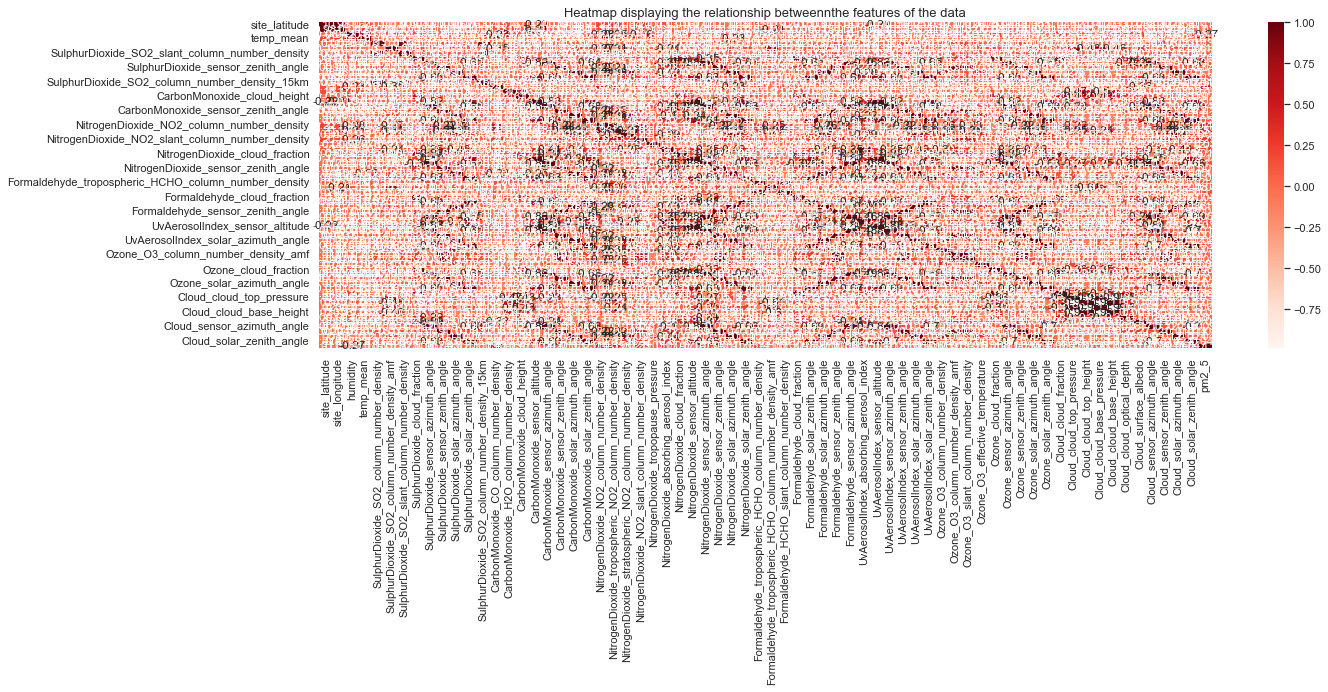

In [155]:
plt.figure(figsize=(20,6))
sns.heatmap(df_train.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

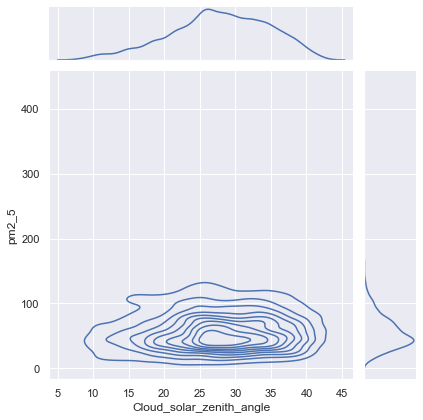

In [156]:
sns.jointplot(x='Cloud_solar_zenith_angle',y='pm2_5',data=df_train, kind= 'kde')

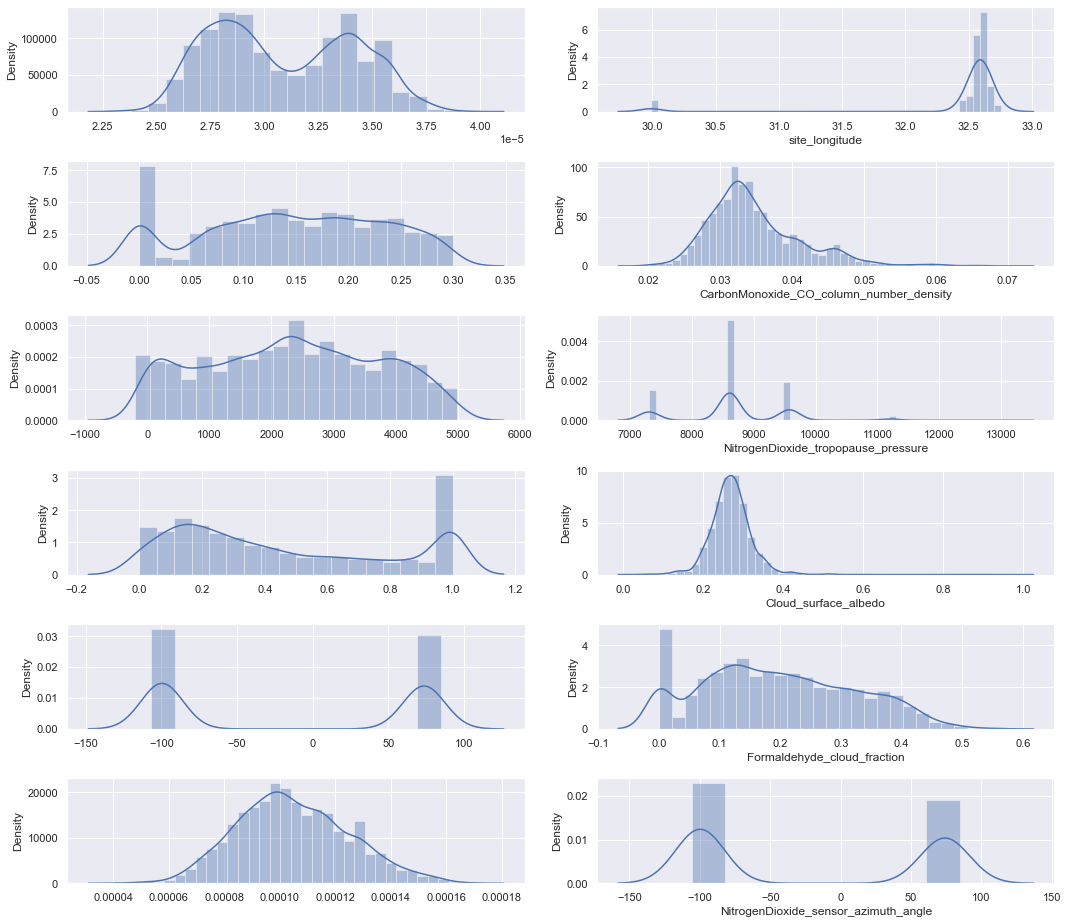

In [157]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.distplot(x= df_train['NitrogenDioxide_stratospheric_NO2_column_number_density'], ax = ax[0,0])
sns.distplot(df_train['site_longitude'], ax = ax[0,1])
sns.distplot(x= df_train['SulphurDioxide_cloud_fraction'], ax = ax[1,0])
sns.distplot(df_train['CarbonMonoxide_CO_column_number_density'], ax = ax[1,1])
sns.distplot(x= df_train['CarbonMonoxide_cloud_height'], ax = ax[2,0])
sns.distplot(df_train['NitrogenDioxide_tropopause_pressure'], ax = ax[2,1])
sns.distplot(x= df_train['Ozone_cloud_fraction'], ax = ax[3,0])
sns.distplot(df_train['Cloud_surface_albedo'], ax = ax[3,1])
sns.distplot(x= df_train['UvAerosolIndex_sensor_azimuth_angle'], ax = ax[4,0])
sns.distplot(df_train['Formaldehyde_cloud_fraction'], ax = ax[4,1])
sns.distplot(x= df_train['NitrogenDioxide_NO2_slant_column_number_density'], ax = ax[5,0])
sns.distplot(df_train['NitrogenDioxide_sensor_azimuth_angle'], ax = ax[5,1])
plt.tight_layout()

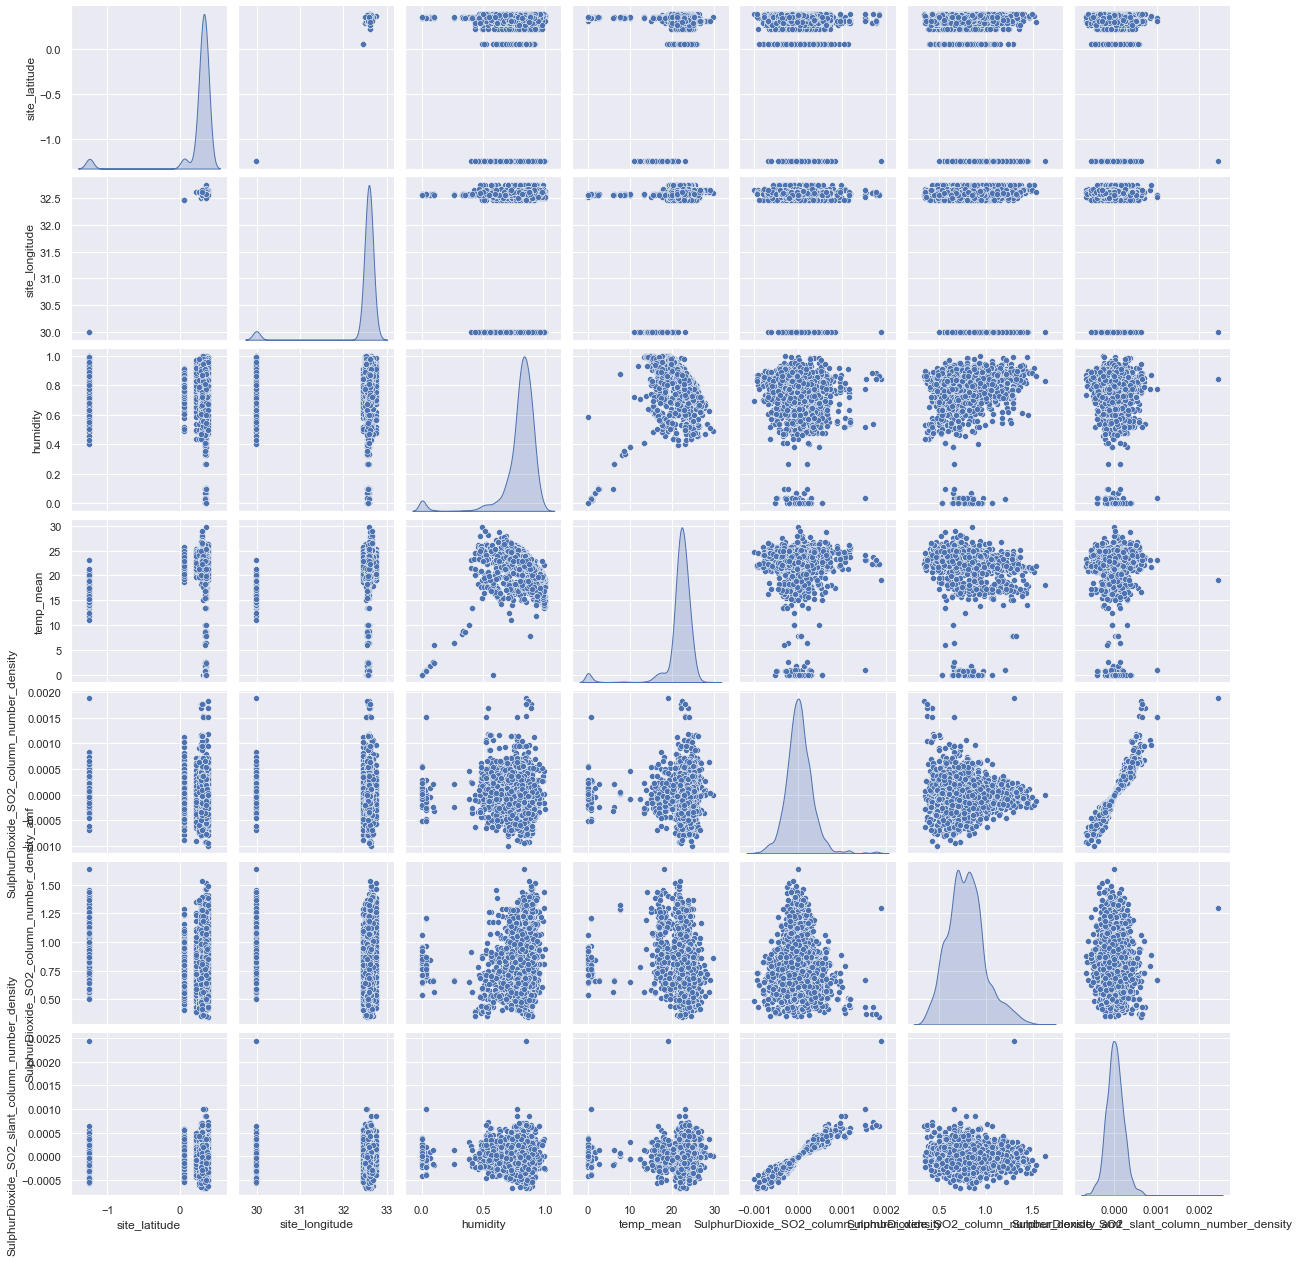

In [158]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')  

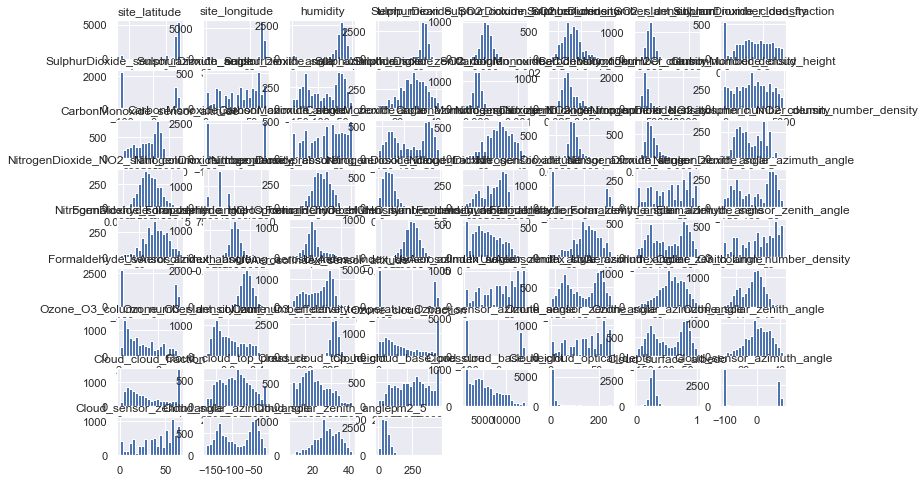

In [159]:
df_train.hist(figsize=(12,8),bins=20)
plt.show()

<Figure size 842.4x595.44 with 0 Axes>

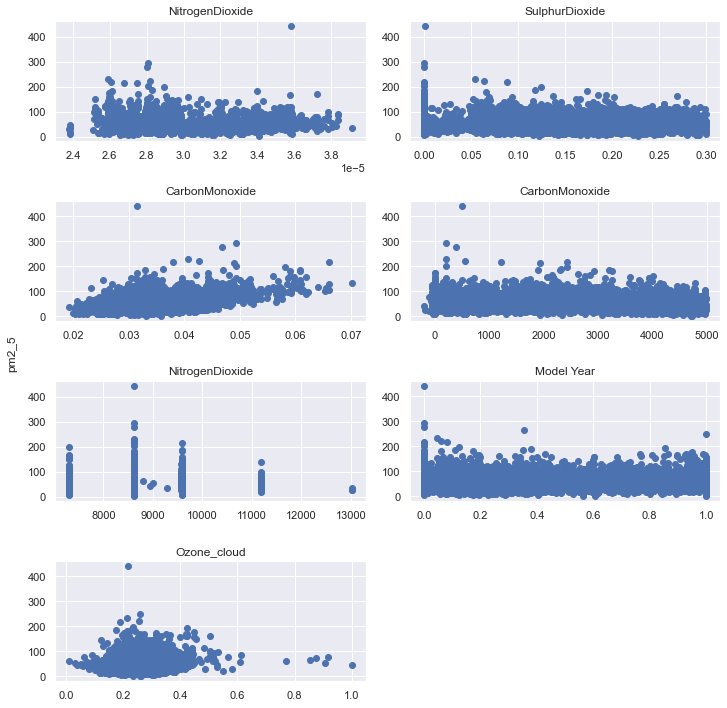

In [160]:
plt.figure(1)
f,axarr = plt.subplots(4,2, figsize=(10,10))
pm2_5val = df_train.pm2_5.values
axarr[0,0].scatter(df_train.NitrogenDioxide_stratospheric_NO2_column_number_density.values, pm2_5val)
axarr[0,0].set_title('NitrogenDioxide')
axarr[0,1].scatter(df_train.SulphurDioxide_cloud_fraction.values, pm2_5val)
axarr[0,1].set_title('SulphurDioxide')
axarr[1,0].scatter(df_train.CarbonMonoxide_CO_column_number_density.values,pm2_5val)
axarr[1,0].set_title('CarbonMonoxide')
axarr[1,1].scatter(df_train.CarbonMonoxide_cloud_height.values, pm2_5val)
axarr[1,1].set_title('CarbonMonoxide')
axarr[2,0].scatter(df_train.NitrogenDioxide_tropopause_pressure.values, pm2_5val)
axarr[2,0].set_title('NitrogenDioxide')
axarr[2,1].scatter(df_train["Ozone_cloud_fraction"].values,pm2_5val)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_train.Cloud_surface_albedo.values, pm2_5val)
axarr[3,0].set_title('Ozone_cloud')
# Rename x axis label as USA, Europe and Japan
#axarr[3,0].set_xticks([1,2,3])
#axarr[3,0].set_xticklabels(["USA","Europe","Asia"])
# Remove the blank plot from the subplots
axarr[3,1].axis("off")
f.text(-0.01, 0.5, 'pm2_5', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [162]:
print(X_train.shape)
print(y_train.shape)

(6946, 67)
(6946,)


In [165]:
# Buiding a transformer for numeric values and onehot enconder for cateorical values
clf_lr = Pipeline(steps=[('remove column', rmissingvaluecol(X_train, 60)), ('missing values', missing_val_imputer(X_train)),
                                  ('skb', SelectKBest(chi2, k = 4)), ('scaler', StandardScaler()), 
                         ('clf', LinearRegression())])

# Columns having more than 60 percent missing values:  0
Columns:
 []


TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '['site_latitude', 'site_longitude', 'humidity', 'temp_mean', 'SulphurDioxide_SO2_column_number_density', 'SulphurDioxide_SO2_column_number_density_amf', 'SulphurDioxide_SO2_slant_column_number_density', 'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle', 'SulphurDioxide_sensor_zenith_angle', 'SulphurDioxide_solar_azimuth_angle', 'SulphurDioxide_solar_zenith_angle', 'SulphurDioxide_SO2_column_number_density_15km', 'CarbonMonoxide_CO_column_number_density', 'CarbonMonoxide_H2O_column_number_density', 'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude', 'CarbonMonoxide_sensor_azimuth_angle', 'CarbonMonoxide_sensor_zenith_angle', 'CarbonMonoxide_solar_azimuth_angle', 'CarbonMonoxide_solar_zenith_angle', 'NitrogenDioxide_NO2_column_number_density', 'NitrogenDioxide_tropospheric_NO2_column_number_density', 'NitrogenDioxide_stratospheric_NO2_column_number_density', 'NitrogenDioxide_NO2_slant_column_number_density', 'NitrogenDioxide_tropopause_pressure', 'NitrogenDioxide_absorbing_aerosol_index', 'NitrogenDioxide_cloud_fraction', 'NitrogenDioxide_sensor_altitude', 'NitrogenDioxide_sensor_azimuth_angle', 'NitrogenDioxide_sensor_zenith_angle', 'NitrogenDioxide_solar_azimuth_angle', 'NitrogenDioxide_solar_zenith_angle', 'Formaldehyde_tropospheric_HCHO_column_number_density', 'Formaldehyde_tropospheric_HCHO_column_number_density_amf', 'Formaldehyde_HCHO_slant_column_number_density', 'Formaldehyde_cloud_fraction', 'Formaldehyde_solar_zenith_angle', 'Formaldehyde_solar_azimuth_angle', 'Formaldehyde_sensor_zenith_angle', 'Formaldehyde_sensor_azimuth_angle', 'UvAerosolIndex_absorbing_aerosol_index', 'UvAerosolIndex_sensor_altitude', 'UvAerosolIndex_sensor_azimuth_angle', 'UvAerosolIndex_sensor_zenith_angle', 'UvAerosolIndex_solar_azimuth_angle', 'UvAerosolIndex_solar_zenith_angle', 'Ozone_O3_column_number_density', 'Ozone_O3_column_number_density_amf', 'Ozone_O3_slant_column_number_density', 'Ozone_O3_effective_temperature', 'Ozone_cloud_fraction', 'Ozone_sensor_azimuth_angle', 'Ozone_sensor_zenith_angle', 'Ozone_solar_azimuth_angle', 'Ozone_solar_zenith_angle', 'Cloud_cloud_fraction', 'Cloud_cloud_top_pressure', 'Cloud_cloud_top_height', 'Cloud_cloud_base_pressure', 'Cloud_cloud_base_height', 'Cloud_cloud_optical_depth', 'Cloud_surface_albedo', 'Cloud_sensor_azimuth_angle', 'Cloud_sensor_zenith_angle', 'Cloud_solar_azimuth_angle', 'Cloud_solar_zenith_angle']' (type <class 'list'>) doesn't